In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Data penelitian final - rawdata.csv')

In [ ]:
df = df.drop(columns= ['Nama', 'Jenis Kelamin'])
df.head()

,Jurusan,DominasiOtak,RIASEC,TipeKecerdasan,GayaBelajar
0,Aktuaria,Seimbang cenderung otak kiri,Social,Verbal/Linguistik,Auditori
1,Aktuaria,Dominan otak kiri,Investigate,Kinestetik,Kinestetik
2,Aktuaria,Dominan otak kanan,Social,Interpersonal,Visual
3,Aktuaria,Dominan otak kiri,Enterprising,Interpersonal,Visual
4,Aktuaria,Seimbang cenderung otak kanan,Artistic,Visual/Spasial,Auditori


In [ ]:
df_encode =pd.get_dummies(df, columns= ['DominasiOtak', 'RIASEC', 'TipeKecerdasan', 'GayaBelajar'], dtype=int)
df_encode.head()

,Jurusan,DominasiOtak_Dominan otak kanan,DominasiOtak_Dominan otak kiri,DominasiOtak_Seimbang cenderung otak kanan,DominasiOtak_Seimbang cenderung otak kiri,RIASEC_Artistic,RIASEC_Conventional,RIASEC_Enterprising,RIASEC_Investigate,RIASEC_Realistic,...,TipeKecerdasan_Intrapersonal,TipeKecerdasan_Kinestetik,TipeKecerdasan_Logis/Matematis,TipeKecerdasan_Musikal,TipeKecerdasan_Naturalis,TipeKecerdasan_Verbal/Linguistik,TipeKecerdasan_Visual/Spasial,GayaBelajar_Auditori,GayaBelajar_Kinestetik,GayaBelajar_Visual
0,Aktuaria,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,Aktuaria,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,Aktuaria,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Aktuaria,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Aktuaria,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


<Axes: >

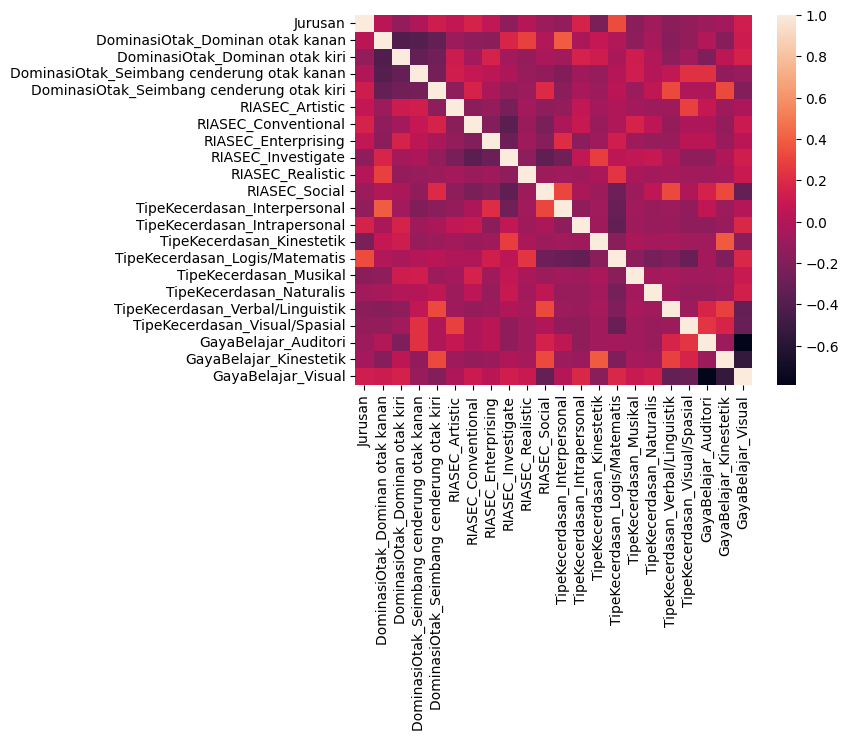

In [ ]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_encode = le.fit_transform(df_encode['Jurusan'].values)
encode_ful = df_encode.copy()
encode_ful['Jurusan'] = label_encode
sns.heatmap(encode_ful.corr())

In [ ]:
df_encode.columns

Index(['Jurusan', 'DominasiOtak_Dominan otak kanan',
       'DominasiOtak_Dominan otak kiri',
       'DominasiOtak_Seimbang cenderung otak kanan',
       'DominasiOtak_Seimbang cenderung otak kiri', 'RIASEC_Artistic',
       'RIASEC_Conventional', 'RIASEC_Enterprising', 'RIASEC_Investigate',
       'RIASEC_Realistic', 'RIASEC_Social', 'TipeKecerdasan_Interpersonal',
       'TipeKecerdasan_Intrapersonal', 'TipeKecerdasan_Kinestetik',
       'TipeKecerdasan_Logis/Matematis', 'TipeKecerdasan_Musikal',
       'TipeKecerdasan_Naturalis', 'TipeKecerdasan_Verbal/Linguistik',
       'TipeKecerdasan_Visual/Spasial', 'GayaBelajar_Auditori',
       'GayaBelajar_Kinestetik', 'GayaBelajar_Visual'],
      dtype='object')

In [ ]:
df_encode_mat_avg = df_encode.groupby(['Jurusan']).agg('mean')
df_encode_mat_avg

,DominasiOtak_Dominan otak kanan,DominasiOtak_Dominan otak kiri,DominasiOtak_Seimbang cenderung otak kanan,DominasiOtak_Seimbang cenderung otak kiri,RIASEC_Artistic,RIASEC_Conventional,RIASEC_Enterprising,RIASEC_Investigate,RIASEC_Realistic,RIASEC_Social,...,TipeKecerdasan_Intrapersonal,TipeKecerdasan_Kinestetik,TipeKecerdasan_Logis/Matematis,TipeKecerdasan_Musikal,TipeKecerdasan_Naturalis,TipeKecerdasan_Verbal/Linguistik,TipeKecerdasan_Visual/Spasial,GayaBelajar_Auditori,GayaBelajar_Kinestetik,GayaBelajar_Visual
Jurusan,,,,,,,,,,,,,,,,,,,,,
Aktuaria,0.222222,0.222222,0.333333,0.222222,0.111111,0.333333,0.111111,0.222222,0.000000,0.222222,...,0.000000,0.111111,0.111111,0.111111,0.000000,0.111111,0.222222,0.222222,0.111111,0.666667
Biokimia,0.400000,0.300000,0.200000,0.100000,0.000000,0.000000,0.100000,0.800000,0.000000,0.100000,...,0.200000,0.100000,0.300000,0.000000,0.200000,0.100000,0.100000,0.100000,0.000000,0.900000
Biologi,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,...,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Ilmu Komputer,0.277778,0.333333,0.222222,0.166667,0.166667,0.166667,0.166667,0.111111,0.055556,0.333333,...,0.055556,0.000000,0.555556,0.000000,0.111111,0.055556,0.111111,0.111111,0.111111,0.777778
Kimia,0.500000,0.166667,0.166667,0.166667,0.000000,0.166667,0.166667,0.666667,0.000000,0.000000,...,0.500000,0.000000,0.333333,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,1.000000
Matematika,0.666667,0.000000,0.333333,0.000000,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000,...,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.666667
Statistika,0.000000,0.000000,0.333333,0.666667,0.000000,0.666667,0.000000,0.333333,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
df_encode_mat_mode = df_encode.groupby(['Jurusan']).agg(pd.Series.mode)
df_encode_mat_mode

,DominasiOtak_Dominan otak kanan,DominasiOtak_Dominan otak kiri,DominasiOtak_Seimbang cenderung otak kanan,DominasiOtak_Seimbang cenderung otak kiri,RIASEC_Artistic,RIASEC_Conventional,RIASEC_Enterprising,RIASEC_Investigate,RIASEC_Realistic,RIASEC_Social,...,TipeKecerdasan_Intrapersonal,TipeKecerdasan_Kinestetik,TipeKecerdasan_Logis/Matematis,TipeKecerdasan_Musikal,TipeKecerdasan_Naturalis,TipeKecerdasan_Verbal/Linguistik,TipeKecerdasan_Visual/Spasial,GayaBelajar_Auditori,GayaBelajar_Kinestetik,GayaBelajar_Visual
Jurusan,,,,,,,,,,,,,,,,,,,,,
Aktuaria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Biokimia,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
Biologi,"[0, 1]","[0, 1]",0,0,0,0,0,"[0, 1]","[0, 1]",0,...,0,0,"[0, 1]","[0, 1]",0,0,0,0,0,1
Ilmu Komputer,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
Kimia,"[0, 1]",0,0,0,0,0,0,1,0,0,...,"[0, 1]",0,0,0,0,0,0,0,0,1
Matematika,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Statistika,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
for i in df_encode_mat_mode :
  for j in range(len(df_encode_mat_mode[i])):
    if list(df_encode_mat_mode[i][j].shape) != []:
      df_encode_mat_mode[i][j] = df_encode_mat_mode[i][j][1]

In [ ]:
df_encode_mat_mode

,DominasiOtak_Dominan otak kanan,DominasiOtak_Dominan otak kiri,DominasiOtak_Seimbang cenderung otak kanan,DominasiOtak_Seimbang cenderung otak kiri,RIASEC_Artistic,RIASEC_Conventional,RIASEC_Enterprising,RIASEC_Investigate,RIASEC_Realistic,RIASEC_Social,...,TipeKecerdasan_Intrapersonal,TipeKecerdasan_Kinestetik,TipeKecerdasan_Logis/Matematis,TipeKecerdasan_Musikal,TipeKecerdasan_Naturalis,TipeKecerdasan_Verbal/Linguistik,TipeKecerdasan_Visual/Spasial,GayaBelajar_Auditori,GayaBelajar_Kinestetik,GayaBelajar_Visual
Jurusan,,,,,,,,,,,,,,,,,,,,,
Aktuaria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Biokimia,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
Biologi,1,1,0,0,0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,1
Ilmu Komputer,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
Kimia,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
Matematika,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Statistika,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


#CREATE MATRIX

In [ ]:
matrix_avg = df_encode_mat_avg.values
matrix_avg

array([[0.22222222, 0.22222222, 0.33333333, 0.22222222, 0.11111111,
        0.33333333, 0.11111111, 0.22222222, 0.        , 0.22222222,
        0.33333333, 0.        , 0.11111111, 0.11111111, 0.11111111,
        0.        , 0.11111111, 0.22222222, 0.22222222, 0.11111111,
        0.66666667],
       [0.4       , 0.3       , 0.2       , 0.1       , 0.        ,
        0.        , 0.1       , 0.8       , 0.        , 0.1       ,
        0.        , 0.2       , 0.1       , 0.3       , 0.        ,
        0.2       , 0.1       , 0.1       , 0.1       , 0.        ,
        0.9       ],
       [0.5       , 0.5       , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.5       , 0.        ,
        0.        , 0.        , 0.        , 0.5       , 0.5       ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.27777778, 0.33333333, 0.22222222, 0.16666667, 0.16666667,
        0.16666667, 0.16666667, 0.11111111, 0.0555555

In [ ]:
matrix_mode = df_encode_mat_mode.values
matrix_mode

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]],
      dtype=object)

#DATA BARU

In [ ]:
new_data = np.array([df_encode.iloc[0].values[1:]])
new_data

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]],
      dtype=object)

#COSINE TEST

In [ ]:
def recommend_cosine_avg(matrix, new_data):
  list_ = (cosine_similarity(matrix, new_data).reshape(1,-1)[0]).tolist()
  save_indeks = {}
  for i in list_ :
    save_indeks[list_.index(i)]= i

  sorted_dict = dict(sorted(save_indeks.items(), key=lambda item: item[1], reverse=True))

  count= 0
  rekomen= []
  similiar =[]
  for i in sorted_dict.keys():
    rekomen.append(df_encode_mat_avg.index.get_level_values(0)[i])
    similiar.append(sorted_dict[i])
    count += 1
    if count == 3:
      break

  return pd.DataFrame({"Rekomendasi Jurusan" : rekomen, "Similiarity": similiar})
count = 0
for i, j in zip(np.arange(len(df_encode['Jurusan'])), df_encode['Jurusan']):
  new_data = np.array([df_encode.iloc[i].values[1:]])
  hasil_prediksi = recommend_cosine_avg(matrix_avg, new_data)['Rekomendasi Jurusan'].head(1).values[0]
  if hasil_prediksi == j:
    count = count +1
akurasi_cosine_avg = count/len(df_encode['Jurusan'])
akurasi_cosine_avg

0.5882352941176471

In [ ]:
def recommend_cosine_mode(matrix, new_data):
  list_ = (cosine_similarity(matrix, new_data).reshape(1,-1)[0]).tolist()
  save_indeks = {}
  for i in list_ :
    save_indeks[list_.index(i)]= i

  sorted_dict = dict(sorted(save_indeks.items(), key=lambda item: item[1], reverse=True))

  count= 0
  rekomen= []
  similiar =[]
  for i in sorted_dict.keys():
    rekomen.append(df_encode_mat_mode.index.get_level_values(0)[i])
    similiar.append(sorted_dict[i])
    count += 1
    if count == 3:
      break

  return pd.DataFrame({"Rekomendasi Jurusan" : rekomen, "Similiarity": similiar})


count = 0
for i, j in zip(np.arange(len(df_encode['Jurusan'])), df_encode['Jurusan']):
  new_data = np.array([df_encode.iloc[i].values[1:]])
  hasil_prediksi = recommend_cosine_mode(matrix_mode, new_data)['Rekomendasi Jurusan'].head(1).values[0]
  if hasil_prediksi == j:
    count = count +1

akurasi_cosine_mode = count/len(df_encode['Jurusan'])
akurasi_cosine_mode

0.37254901960784315

#JACCARD

In [ ]:
from sklearn.metrics import jaccard_score
def recommend_jacard(matrix, new_data):
  jaccard_score_list = []
  for i in matrix:
    lis_jaccard = jaccard_score(i.astype(int), new_data[0].astype(int))
    jaccard_score_list.append(lis_jaccard)

  save_indeks = {}
  for i in jaccard_score_list :
    save_indeks[jaccard_score_list.index(i)]= i

  sorted_dict = dict(sorted(save_indeks.items(), key=lambda item: item[1], reverse=True))

  count= 0
  rekomen= []
  similiar =[]
  for i in sorted_dict.keys():
    rekomen.append(df_encode_mat_mode.index.get_level_values(0)[i])
    similiar.append(sorted_dict[i])
    count += 1
    if count == 3:
      break

  return pd.DataFrame({"Rekomendasi Jurusan" : rekomen, "Similiarity": similiar})



count = 0
for i, j in zip(np.arange(len(df_encode['Jurusan'])), df_encode['Jurusan']):
  new_data = np.array([df_encode.iloc[i].values[1:]])
  hasil_prediksi = recommend_jacard(matrix_mode, new_data)['Rekomendasi Jurusan'].head(1).values[0]
  if hasil_prediksi == j:
    count = count +1

akurasi_jaccard_mode = count/len(df_encode['Jurusan'])
akurasi_jaccard_mode

0.35294117647058826

#DATA BARU

In [ ]:
df_form= pd.read_csv('/content/Form penelitian penentuan jurusan (Jawaban) - Form Responses 1.csv')
df_form

,Timestamp,"Assalamualaikum warahmatullah wabarakatuh. Halo teman-teman!\n\nPerkenalkan kami dari kelompok 2 mata kuliah Capstone departemen ilmu komputer. Saat ini kami sedang mengembangkan sistem rekomendasi jurusan di IPB University. Kami ingin mengajak Anda untuk berpartisipasi dalam survei ini untuk meningkatkan sistem rekomendasi jurusan bagi para siswa SMA yang ingin melanjutkan ke jenjang perguruan tinggi.\n\nMohon bantu kami dengan memberikan informasi akademik dan minat pribadi Anda selama SMA. Data ini akan digunakan secara anonim dan hanya untuk kepentingan penelitian. Partisipasi Anda sangat berarti bagi pengembangan sistem rekomendasi yang lebih akurat dan relevan. Terima kasih atas kontribusi Anda!\n\nBagi yang ingin mendapatkan hadiah bisa mengisi nomor telepon pada form ini. Penerima hadiah akan dipilih secara acak.\n\nJika kamu ingin melanjutkan maka pilih ""Ya"".",Nama Lengkap,Jenis Kelamin,Jurusan,Nomor HP,Bagian 01 [Saya suka memperbaiki alat-alat listrik],Bagian 01 [Saya mampu membuat gambar dengan skala],Bagian 01 [Saya mampu menggunakan peralatan mesin],Bagian 01 [Saya mampu melakukan perbaikan kecil pada alat listrik],...,"Ketika merangkai suatu barang, kamu lebih suka:\n1. Mengikuti ilustrasi cara merangkainya.\n2. Mendengarkan orang membacakan instruksinya untukmu.\n3. Langsung mengerjakannya tanpa mengikuti instruksi.","Jika akan menghadapi ulangan, kamu mudah hafal jika:\nV: Membolak-balik buku membaca materi ulangan.\nA: Menghafal materi ulangan sambil mengucapkannya keras-keras.\nK: Berjalan bolak-balik sambil menghafal.","Saat membaca suatu buku, yang sering kamu lakukan adalah:\n1. Membacanya dengan tenang, cepat dan tekun.\n2. Membaca sambil menggerakkan bibir dan mengucapkannya.\n3. Menelusuri tiap-tiap kata dengan jari telunjukmu.","Saat berbicara, kamu:\n1. Berbicara dengan cepat\n2. Berbicara dengan kecepatan sedang\n3. Berbicara dengan kecepatan lambat","Di waktu luang, kamu biasanya:\n1. Menonton televisi, membaca, mengisi TTS\n2. Mendengarkan radio, mengobrol\n3. Berjalan-jalan, olahraga, hiking","Kalau kamu marah, biasanya paling terlihat dari:\n1. Ekspresi wajah.\n2. Intonasi suara.\n3. Gerak Tubuh","Biasanya pada saat kamu tidak ada kegiatan:\n1. Melamun, menatap ke angkasa.\n2. Berbicara dengan diri sendiri.\n3. Gelisah tak bisa duduk tenang.","Pilih kegiatan yang kamu merasa nyaman melakukannya:\n1. Menulis, Menggambar, Mendesain\n2. Berdebat, Bercerita, Bermain musik\n3. Menari, Berolahraga, Membuat kerajinan tangan","Kata-kata khas saat kamu berbicara:\n1. ""Lihat baik-baik...""\n2. ""Dengarkan baik-baik...""\n3. ""Rasakan baik-baik...""","Mana yang paling sering terjadi saat di sekolah:\n1. Kamu memperhatikan wajah guru saat beliau berbicara/menerangkan\n2. Kamu mendengarkan saja waktu guru menerangkan\n3. Saat guru menerangkan, tangan kamu tidak bisa diam, memain-mainkan pulpen."
0,09/03/2024 21:07:38,Ya,Muhammad Nafiz,Pria,Statistika,081290105116,Sangat Tidak Setuju,Sangat Tidak Setuju,Sangat Tidak Setuju,Sangat Tidak Setuju,...,1,1,1,1,1,1,2,2,1,2
1,09/03/2024 21:14:11,Ya,Tajmahal Ghaza Antoni,Pria,Aktuaria,081282026530,Sangat Tidak Setuju,Sangat Tidak Setuju,Sangat Tidak Setuju,Sangat Tidak Setuju,...,1,1,1,1,1,1,2,1,2,1
2,10/03/2024 17:35:12,Ya,Grasela Anggi Asimima Marbun,Wanita,Ilmu Komputer,NaN,Agak Setuju,Agak Setuju,Setuju,Agak Setuju,...,2,2,2,2,2,2,2,2,2,2
3,10/03/2024 18:26:39,Ya,Alexandra Victoria Gunawan,Wanita,Fisika,081280290088,Tidak Setuju,Tidak Setuju,Tidak Setuju,Tidak Setuju,...,3,1,2,1,2,3,2,2,1,1
4,10/03/2024 18:48:50,Ya,Lovinda Darmawan,Wanita,Fisika,082128036948,Tidak Setuju,Setuju,Agak Setuju,Tidak Setuju,...,3,2,1,2,2,2,1,2,1,1
5,10/03/2024 18:50:06,Ya,Erlisa Sathya Pandia,Wanita,Fisika,085778500812,Tidak Setuju,Setuju,Setuju,Tidak Setuju,...,3,1,1,2,1,1,1,2,2,2
6,10/03/2024 18:57:35,Ya,Naila Khoiriyah,Wanita,Fisika,081389676261,Agak Setuju,Agak Setuju,Agak Setuju,Tidak Setuju,...,1,2,1,1,2,1,3,2,2,3
7,10/03/2024 20:22:43,Ya,Nazwa Nuradilla Putri,Wani

##RIASEC

In [ ]:
df_question = df_form.drop(columns = df_form.columns[:6])

In [ ]:
R= df_question[df_question.columns[:10]]
I = df_question[df_question.columns[10:20]]
A= df_question[df_question.columns[20:30]]
S= df_question[df_question.columns[30:40]]
E =df_question[df_question.columns[40:50]]
C= df_question[df_question.columns[50:60]]

In [ ]:
conv_riasec = {
    "Sangat Tidak Setuju":1,
    "Tidak Setuju":2,
    "Agak Setuju":3,
    "Setuju":4,
    "Sangat Setuju":5
}

In [ ]:
for i in R :
  R[i]= R[i].map(conv_riasec)
R['Total'] = R.loc[:].sum(axis=1)
R

<ipython-input-174-8542d0739426>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R[i]= R[i].map(conv_riasec)
<ipython-input-174-8542d0739426>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R[i]= R[i].map(conv_riasec)
<ipython-input-174-8542d0739426>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

,Bagian 01 [Saya suka memperbaiki alat-alat listrik],Bagian 01 [Saya mampu membuat gambar dengan skala],Bagian 01 [Saya mampu menggunakan peralatan mesin],Bagian 01 [Saya mampu melakukan perbaikan kecil pada alat listrik],"Bagian 01 [Saya mampu melakukan perbaikan kecil pada pipa air,kran,dan lain-lain]",Bagian 01 [Saya tertarik menjadi mekanik],Bagian 01 [Saya tertarik menjadi ahli mesin],Bagian 01 [Saya tertarik menjadi penanggung jawab kemanan],Bagian 01 [Saya tertarik menjadi operator alat - alat berat],Bagian 01 [Saya tertarik menjadi spesialis perikanan/margasatwa],Total
0,1,1,1,1,1,1,1,1,1,1,10
1,1,1,1,1,1,1,1,1,1,1,10
2,3,3,4,3,3,3,3,3,3,3,31
3,2,2,2,2,2,2,3,2,3,2,22
4,2,4,3,2,4,4,4,3,2,3,31
5,2,4,4,2,3,2,2,2,2,2,25
6,3,3,3,2,2,2,2,2,2,2,23
7,4,2,5,2,2,2,2,3,2,2,26
8,5,4,3,5,5,4,2,4,3,1,36
9,4,4,3,5,4,4,4,3,2,3,36


In [ ]:
for i in I :
  I[i]= I[i].map(conv_riasec)
I['Total'] =I.loc[:].sum(axis=1)
I

<ipython-input-175-664faea2ba31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  I[i]= I[i].map(conv_riasec)
<ipython-input-175-664faea2ba31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  I[i]= I[i].map(conv_riasec)
<ipython-input-175-664faea2ba31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

,Bagian 02 [Saya suka membaca buk / majalah ilmiah],Bagian 02 [Saya suka bekerja di laboratorium],Bagian 02 [Saya suka mengerjakan proyek ilmiah],Bagian 02 [saya mampu melakukan percobaan atau penelitian ilmiah],Bagian 02 [Saya mampu mengerti mengapa satelit tidak jatuh ke bumi],Bagian 02 [Saya tertarik menjadi ahli biologi/hayati],Bagian 02 [Saya tertaik menjadi ahli astronomi/perbintangan],Bagian 02 [Saya tertarik menjadi ahli kimia],Bagian 02 [Saya tertarik menjadi ahli geologi],Bagian 02 [Saya tertarik menjadi pekerja riset ilmiah],Total
0,2,1,1,2,3,1,1,1,1,1,14
1,3,1,4,3,1,1,1,1,1,4,20
2,3,3,3,3,3,3,3,3,3,3,30
3,3,5,4,4,3,4,3,3,3,3,35
4,4,4,4,4,4,2,5,2,4,4,37
5,5,4,4,4,4,2,3,1,1,5,33
6,3,3,3,3,4,2,4,2,3,4,31
7,3,5,5,5,4,2,3,3,2,5,37
8,4,5,4,5,4,3,5,3,3,5,41
9,4,5,5,4,4,3,4,3,4,5,41


In [ ]:
for i in A :
  A[i]= A[i].map(conv_riasec)
A['Total'] =A.loc[:].sum(axis=1)
A

<ipython-input-176-b99c9a6bf749>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A[i]= A[i].map(conv_riasec)
<ipython-input-176-b99c9a6bf749>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A[i]= A[i].map(conv_riasec)
<ipython-input-176-b99c9a6bf749>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

,"Bagian 03 [Saya suka membuat sketsa, menggambar, atau melukis]",Bagian 03 [Saya suka menjadi pemain dalam teater atau drama],Bagian 03 [Saya suka memainkan alat musik],Bagian 03 [Saya suka membaca atau menulis puisi],Bagian 03 [Saya suka menulis novel/cerita],Bagian 03 [Saya mampu memainkan alat musik],Bagian 03 [Saya mampu membuat sketsa orang sehingga dapat dikenali],Bagian 03 [Saya tertarik menjadi penulis],Bagian 03 [Saya tertarik menjadi pemain musik],Bagian 03 [Saya tertarik menjadi aktor],Total
0,1,1,1,1,1,1,1,1,1,1,10
1,1,1,1,1,1,1,1,1,1,1,10
2,3,3,3,3,3,3,3,3,3,3,30
3,3,5,3,2,2,3,3,2,2,3,28
4,2,4,5,2,4,4,2,4,4,4,35
5,1,1,4,3,4,4,1,2,2,2,24
6,2,2,2,3,3,2,2,3,2,4,25
7,5,3,5,2,2,5,2,2,5,3,34
8,4,5,5,5,5,4,3,5,5,5,46
9,5,3,5,4,3,4,2,3,4,1,34


In [ ]:
for i in S :
  S[i]= S[i].map(conv_riasec)
S['Total'] = S.loc[:].sum(axis=1)
S

<ipython-input-177-3ad06df0c8c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S[i]= S[i].map(conv_riasec)
<ipython-input-177-3ad06df0c8c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S[i]= S[i].map(conv_riasec)
<ipython-input-177-3ad06df0c8c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

,Bagian 04 [Saya suka bertemu dengan pengamat sosial/pendidikan],Bagian 04 [Saya suka bekerja sebagai relawan],Bagian 04 [Saya suka menjaga/mengurus anak-anak],Bagian 04 [Saya mudah berbicara dengan semua orang],Bagian 04 [Saya mampu memimpin diksusi kelompok],Bagian 04 [Saya mampu mengajari anak-anak dengan mudah],Bagian 04 [Saya mampu menghibur dan menemani orang yang lebih tua dari saya],Bagian 04 [Saya mampu berpartisipasi dalam pencarian dana/amal],Bagian 04 [Saya tertarik menjadi konselor masalah pribadi],Bagian 04 [Saya tertarik menjadi pekerja sosial],Total
0,2,3,2,3,3,3,2,3,3,2,26
1,2,2,2,2,4,4,4,4,3,1,28
2,3,3,3,3,3,3,3,3,3,3,30
3,3,3,5,5,5,5,5,3,4,3,41
4,4,5,4,4,4,4,5,4,4,4,42
5,3,1,2,4,3,2,3,2,2,2,24
6,3,4,4,4,4,4,4,4,4,4,39
7,5,5,5,5,5,5,5,5,5,4,49
8,4,4,4,5,5,5,5,5,3,4,44
9,4,4,4,3,3,4,4,4,3,2,35


In [ ]:
for i in E :
  E[i]= E[i].map(conv_riasec)
E['Total'] = E.loc[:].sum(axis=1)
E

<ipython-input-178-cbb0bf05d85f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E[i]= E[i].map(conv_riasec)
<ipython-input-178-cbb0bf05d85f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E[i]= E[i].map(conv_riasec)
<ipython-input-178-cbb0bf05d85f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

,Bagian 05 [Saya suka memengaruhi orang lain],Bagian 05 [Saya suka menjual suatu produk],Bagian 05 [Saya suka mempelajari strategi untuk keberhasilan bisnis],Bagian 05 [Saya suka menjadi pemimpin kelompok],Bagian 05 [Saya mampu menjadi seorang pembicara yang baik],Bagian 05 [Saya mampu mengelola usaha kecil],Bagian 05 [Saya mampu membuat kelompok berjalan dengan baik],Bagian 05 [Saya mampu mengatur pekerjaan orang lain],Bagian 05 [Saya tertaik menjadi pembawa acara/MC],Bagian 05 [Saya tertarik menjadi eksekutif periklanan],Total
0,3,2,3,3,3,2,3,3,2,3,27
1,3,2,4,3,4,1,4,4,1,1,27
2,3,3,3,3,3,3,3,3,3,3,30
3,5,3,5,5,5,3,5,5,5,5,46
4,3,4,4,3,4,3,4,4,4,4,37
5,5,2,2,2,3,2,3,2,1,1,23
6,3,3,3,4,4,3,4,4,4,2,34
7,4,5,5,5,5,5,5,4,5,3,46
8,4,5,4,4,4,5,4,4,5,5,44
9,2,3,3,3,2,2,4,3,2,4,28


In [ ]:
for i in C :
  C[i]= C[i].map(conv_riasec)
C['Total'] = C.loc[:].sum(axis=1)
C

<ipython-input-179-09df46408afd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C[i]= C[i].map(conv_riasec)
<ipython-input-179-09df46408afd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C[i]= C[i].map(conv_riasec)
<ipython-input-179-09df46408afd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

,Bagian 06 [Saya suka melakukan pekerjaan surat menyurat / perkantoran],Bagian 06 [Saya suka melakukan operasi matematika dalam bisnis],Bagian 06 [Saya suka menyusun sistem pengarsipan],Bagian 06 [Saya suka membuat daftar inventaris dari persediaan/produk],Bagian 06 [Saya mampu mengetik dengan cepat],Bagian 06 [Saya mampu melakukan pekerjaan administrasi kantor],Bagian 06 [Saya mampu mencatat dengan cermat pembayaran/penjualan],Bagian 06 [Saya tertarik menjadi ahli pembukuan],Bagian 06 [Saya tertarik menjadi manajer penjualan],Bagian 06 [Saya tertarik menjadi analis keuangan],Total
0,1,4,2,2,4,2,3,2,2,3,25
1,1,5,4,4,5,3,5,2,2,5,36
2,3,3,3,3,3,3,3,3,3,3,30
3,4,5,5,5,5,5,5,5,5,5,49
4,3,4,4,3,4,3,4,4,5,5,39
5,2,2,2,2,3,2,2,2,2,2,21
6,3,2,3,2,3,3,2,2,2,3,25
7,3,4,5,4,4,5,5,5,5,5,45
8,4,5,4,4,4,4,4,3,4,3,39
9,2,3,2,2,4,3,4,2,2,3,27


In [ ]:
RIASEC_df = pd.DataFrame()
RIASEC_df['R'] = R['Total']
RIASEC_df['I'] = I['Total']
RIASEC_df['A'] = A['Total']
RIASEC_df['S'] = S['Total']
RIASEC_df['E'] = E['Total']
RIASEC_df['C'] = C['Total']

In [ ]:
dict_riasec ={
    'R':'Realistic',
    'I':'Investigate',
    'A':'Artistic',
    'S':'Social',
    'E':'Enterprising',
    'C':'Conventional',
}

In [ ]:
hasil_Riasec =[]
for i in range(RIASEC_df.shape[0]):
  hasil_Riasec.append(RIASEC_df.columns[(np.argmax(RIASEC_df.iloc[i]))])

In [ ]:
RIASEC_df['Hasil']=[dict_riasec[i] for i in hasil_Riasec]

In [ ]:
RIASEC_df

,R,I,A,S,E,C,Hasil
0,10,14,10,26,27,25,Enterprising
1,10,20,10,28,27,36,Conventional
2,31,30,30,30,30,30,Realistic
3,22,35,28,41,46,49,Conventional
4,31,37,35,42,37,39,Social
5,25,33,24,24,23,21,Investigate
6,23,31,25,39,34,25,Social
7,26,37,34,49,46,45,Social
8,36,41,46,44,44,39,Artistic
9,36,41,34,35,28,27,Investigate


In [ ]:
RIASEC_df.to_csv('hasil_riasec.csv')

#DOMINANSI OTAK

In [ ]:
df_dominasi_otak = df_question[df_question.columns[60]]

In [ ]:
df_dominasi_otak.to_csv('dominansi_otak.csv')

#Tipe Kecerdasan

In [ ]:
df['TipeKecerdasan'].value_counts()

TipeKecerdasan
Logis/Matematis      21
Intrapersonal         7
Interpersonal         6
Visual/Spasial        6
Naturalis             4
Verbal/Linguistik     3
Kinestetik            2
Musikal               2
Name: count, dtype: int64

#GAYA BELAJAR

In [ ]:
len(df_question.columns)

151

In [ ]:
gaya_belajar_df = df_question[df_question.columns[141:]]

In [ ]:
gaya_belajar_df.head()

,"Ketika merangkai suatu barang, kamu lebih suka:\n1. Mengikuti ilustrasi cara merangkainya.\n2. Mendengarkan orang membacakan instruksinya untukmu.\n3. Langsung mengerjakannya tanpa mengikuti instruksi.","Jika akan menghadapi ulangan, kamu mudah hafal jika:\nV: Membolak-balik buku membaca materi ulangan.\nA: Menghafal materi ulangan sambil mengucapkannya keras-keras.\nK: Berjalan bolak-balik sambil menghafal.","Saat membaca suatu buku, yang sering kamu lakukan adalah:\n1. Membacanya dengan tenang, cepat dan tekun.\n2. Membaca sambil menggerakkan bibir dan mengucapkannya.\n3. Menelusuri tiap-tiap kata dengan jari telunjukmu.","Saat berbicara, kamu:\n1. Berbicara dengan cepat\n2. Berbicara dengan kecepatan sedang\n3. Berbicara dengan kecepatan lambat","Di waktu luang, kamu biasanya:\n1. Menonton televisi, membaca, mengisi TTS\n2. Mendengarkan radio, mengobrol\n3. Berjalan-jalan, olahraga, hiking","Kalau kamu marah, biasanya paling terlihat dari:\n1. Ekspresi wajah.\n2. Intonasi suara.\n3. Gerak Tubuh","Biasanya pada saat kamu tidak ada kegiatan:\n1. Melamun, menatap ke angkasa.\n2. Berbicara dengan diri sendiri.\n3. Gelisah tak bisa duduk tenang.","Pilih kegiatan yang kamu merasa nyaman melakukannya:\n1. Menulis, Menggambar, Mendesain\n2. Berdebat, Bercerita, Bermain musik\n3. Menari, Berolahraga, Membuat kerajinan tangan","Kata-kata khas saat kamu berbicara:\n1. ""Lihat baik-baik...""\n2. ""Dengarkan baik-baik...""\n3. ""Rasakan baik-baik...""","Mana yang paling sering terjadi saat di sekolah:\n1. Kamu memperhatikan wajah guru saat beliau berbicara/menerangkan\n2. Kamu mendengarkan saja waktu guru menerangkan\n3. Saat guru menerangkan, tangan kamu tidak bisa diam, memain-mainkan pulpen."
0,1,1,1,1,1,1,2,2,1,2
1,1,1,1,1,1,1,2,1,2,1
2,2,2,2,2,2,2,2,2,2,2
3,3,1,2,1,2,3,2,2,1,1
4,3,2,1,2,2,2,1,2,1,1


In [ ]:
convert_gaya_belajar = {
    1: 'Visual',
    2:'Auditori',
    3: 'Kinestetik'
}

In [ ]:
import statistics
gaya_belajar_df['Hasil']= [convert_gaya_belajar[statistics.mode(gaya_belajar_df.iloc[i])] for i in range(gaya_belajar_df.shape[0]) ]

<ipython-input-265-c50c151c45c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gaya_belajar_df['Hasil']= [convert_gaya_belajar[statistics.mode(gaya_belajar_df.iloc[i])] for i in range(gaya_belajar_df.shape[0]) ]


In [ ]:
gaya_belajar_df.to_csv('gaya_belajar.csv')